In [19]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import os

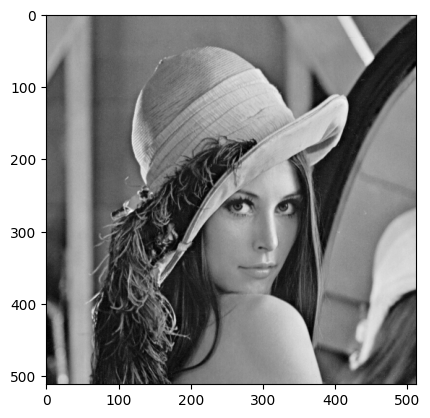

In [20]:
test = cv.imread('lena.png',0)
plt.imshow(test, cmap= 'gray')


[[169,
  86,
  168,
  88,
  169,
  91,
  170,
  88,
  170,
  88,
  169,
  88,
  163,
  86,
  166,
  93,
  164,
  92,
  167,
  88,
  162,
  91,
  163,
  91,
  161,
  91,
  163,
  94,
  163,
  93,
  161,
  91,
  162,
  90,
  164,
  89,
  166,
  82,
  167,
  82,
  173,
  82,
  173,
  78,
  177,
  74,
  179,
  79,
  178,
  77,
  174,
  75,
  175,
  82,
  170,
  87,
  159,
  98,
  161,
  105,
  140,
  122,
  128,
  138,
  110,
  145,
  106,
  152,
  101,
  149,
  112,
  148,
  112,
  145,
  114,
  140,
  116,
  139,
  116,
  133,
  120,
  136,
  118,
  138,
  116,
  136,
  118,
  135,
  118,
  136,
  118,
  136,
  122,
  135,
  118,
  135,
  119,
  135,
  120,
  137,
  115,
  139,
  118,
  136,
  119,
  133,
  126,
  132,
  125,
  127,
  132,
  125,
  125,
  121,
  132,
  123,
  134,
  122,
  132,
  119,
  136,
  115,
  140,
  121,
  135,
  116,
  142,
  113,
  142,
  114,
  145,
  115,
  139,
  114,
  141,
  116,
  143,
  110,
  142,
  111,
  143,
  113,
  139,
  114,
  144,
  117,
  140,


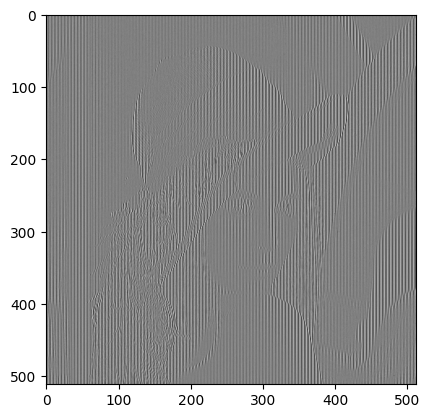

In [14]:
def negative(I, t, ptOut=None):
    new_im=[]
    for i in I:
        a = list(i)
        for j in range(t, len(a),2):
            a[j] = 255-a[j]
        new_im.append(a)
        cv.imwrite('es_1.jpg',np.array(new_im))
        plt.imshow(new_im, cmap='gray')
    return new_im
    

negative(test,1)


(array([[169, 169, 168, ..., 175, 162, 138],
        [169, 169, 168, ..., 175, 162, 138],
        [169, 169, 168, ..., 175, 162, 138],
        ...,
        [ 56,  56,  61, ..., 103, 103, 103],
        [ 56,  56,  56, ..., 107, 106, 103],
        [ 56,  56,  59, ..., 114, 109, 109]], dtype=uint8),
 array([[169, 169, 168, ..., 175, 162, 138],
        [169, 169, 168, ..., 175, 162, 138],
        [169, 169, 168, ..., 175, 162, 138],
        ...,
        [ 59,  59,  61, ...,  80,  89,  99],
        [ 59,  59,  61, ...,  85,  93,  99],
        [ 56,  56,  61, ...,  93, 102, 103]], dtype=uint8))

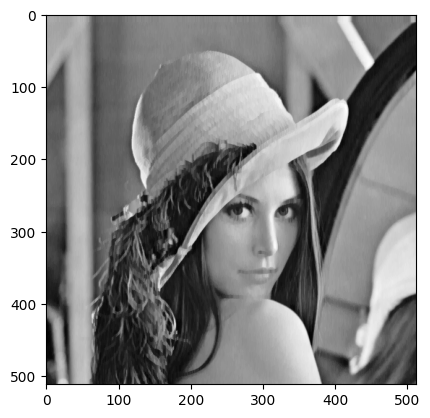

In [7]:
def morph(I, ptOut=None):
    Oeroded = cv.erode(I, (7,7), iterations=3)
    Odilated = cv.dilate(Oeroded, (7,7), iterations=3)

    plt.imshow(Odilated, cmap='gray')
    cv.imwrite('Operoded.jpg', Odilated)

    Cdilated = cv.dilate(Odilated, (7,7), iterations=3)
    Ceroded = cv.erode(Cdilated, (7,7), iterations=3)

    plt.imshow(Ceroded, cmap='gray')
    cv.imwrite('Cleroded.jpg', Ceroded)
    
    return Odilated, Ceroded




morph(test)

### 3. Random-blocks(I): Divide the image into 4 blocks (b1, b2, b3, b4) of the same size and calculate:
a. on block b1 the mathematical morphology (with respect to some selected by the student)
b. on block b2 the interpolation (student's choice)
c. on block b3 the Negative 
d. on block b4 any operation chosen by the student
Reconstruct, show and save the final image obtained from the concatenation of the different outputs (see 
figure). 

In [37]:
def Random_blocks(I):
    h, w = I.shape
    new_img = np.zeros((w, h))
    b1 = I[0:w//2, 0:h//2]
    b2 = I[w//2:, 0:h//2]
    b3 = I[0:w//2, h//2:]
    b4 = I[w//2:, h//2:]

    hb,wb = b2.shape
    b2t = b2[0:-20,0:-30]
    b2 = cv.resize(b2t, (wb, hb), interpolation = cv.INTER_AREA)

    b3 = negative(b3,1)
    b4 = negative(b4,0)

    new_img[0:w//2, 0:h//2] = b1
    new_img[w//2:, 0:h//2] = b2
    new_img[0:w//2, h//2:] = b3
    new_img[w//2:, h//2:] = b4

    return new_img



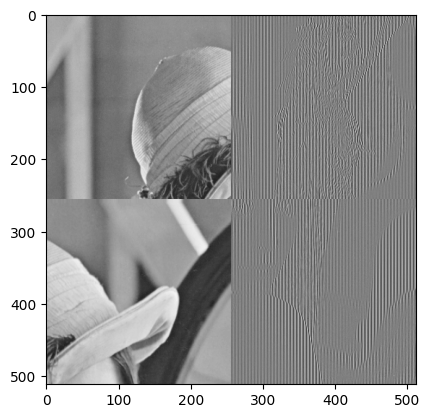

In [38]:
testing = Random_blocks(test)
plt.imshow(testing, cmap='gray')